In [15]:
%matplotlib inline

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.integrate as inte
import scipy.special as spec
import sympy as sp
sp.init_printing()

from matplotlib import animation, rc
from IPython.display import HTML, Image, set_matplotlib_formats
set_matplotlib_formats('png','pdf')

rc('animation', html='html5')

# Particule chargée dans un champ $(\mathbf E,\mathbf B)$

In [49]:
class Domain:
    
    def __init__(self, xm, ym, I, J):
        self.xm = xm
        self.xs = np.linspace(-xm,xm,I)
        self.I = I
        
        self.ym = ym
        self.ys = np.linspace(-ym,ym,J)
        self.J = J
        
        self.grid = np.meshgrid(self.xs, self.ys)

class Field:
    
    def __init__(self,omega):
        self.omega = omega
        self.k = omega/3e8
    
    def E(self,x,y,z,t):
        omega = self.omega
        k = self.k
        r = (x**2+y**2)**0.5
        ez = 0.05*spec.j0(k*r)*np.cos(omega*t)
        return 0,0,ez
    
    def B(self,x,y,z,t):
        omega = self.omega
        by = 0.05*np.cos(omega*(x-t))
        return 0,by,0
    
    def Force(self,state,t):
        charge = 1e4
        pos, vel = state[0:3],state[3:6]
        acc = charge*(self.E(*pos,t) + \
                np.cross(vel,self.B(*pos,t)))
        return np.concatenate((vel,acc))

In [78]:
class Simu(Domain):
    
    def trajectoire(self, r0, v0, tm, N):
        champ = Field(100)
        
        condinit = np.concatenate((r0,v0))
        
        times = self.times = np.linspace(0,tm,N)
        
        sol = inte.odeint(champ.Force, condinit, times)
        self.pos,self.vel = np.hsplit(sol,2)
        
        times = self.times
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.grid(True)
        ax.set_aspect('equal')
        ax.plot(*self.pos.T)
        self.graph = fig
    
    def setup_surface(self):
        grid = self.grid
        
        fig = plt.figure(1)
        ax = fig.add_subplot(111, projection='3d')
        ax.grid(True)
        ax.set_aspect('equal')
        
        return grid,fig, ax
        
    def surface(self,t):
        champ = Field(4e8)
        grid,fig,ax = self.setup_surface()
        xg,yg = grid
        Ex, Ey, Ez = champ.E(x=xg, y=yg, z=0, t=t)
        
        ax.plot_surface(*grid, Ez)
        
        self.surf = fig
    
    def animate(self, tm, N):
        champ = Field(4e8)
        dt = tm/N
        interval = 1000/25       
        
        grid,fig,ax = self.setup_surface()
        xg,yg = grid
        def fieldo(t):
            Ex, Ey, Ez = champ.E(x=xg, y=yg, z=0, t=t)
            return Ez
        
        Ez = fieldo(0)
        zlims = (Ez.min(),Ez.max())
        
        surf = ax.plot_wireframe(*grid, fieldo(0))
        ax.set_zlim(zlims)
        
        def update(i):
            ti = i*dt/N
            Ez = fieldo(ti)
            data = 
        
        anim = animation.FuncAnimation(fig,update,
                        frames=N,interval=interval)
        return anim
        

In [79]:
sim = Simu(3,3,50,50)

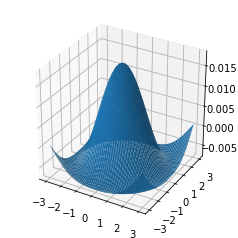

In [80]:
sim.surface(3e-9)

TypeError: update() argument after * must be an iterable, not Line3DCollection

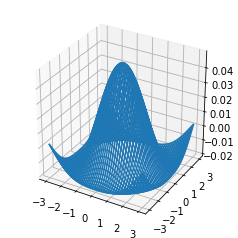

In [81]:
sim.animate(1e-10, 50)